## LIBRARIES

In [ ]:
 install.packages ("scales")
 install.packages ("repr")
 install.packages ("mice")
 install.packages ("corrplot")
 install.packages ("fdaoutlier")
 install.packages("dplyr")
 install.packages("caTools")    
 install.packages("car")
install.packages ("ggthemes")


# library (VIF)
my_packages <- c("dplyr", "ggplot2", "readr", "scales", "fdaoutlier", "mice", "corrplot","caTools" ,"car", "ggthemes")
lapply(my_packages, library, character.only = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching pac

[[1]]
[1] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "ggplot2"   "dplyr"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "readr"     "ggplot2"   "dplyr"     "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "scales"    "readr"     "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "fdaoutlier" "scales"     "readr"      "ggplot2"    "dplyr"     
 [6] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[11] "methods"    "base"      

[[6]]
 [1] "mice"       "fdaoutlier" "scales"     "readr"      "ggplot2"   
 [6] "dplyr"      "stats"      "graphics"   "grDevices"  "utils"     
[11] "datasets"   "methods"    "base"      

[[7]]
 [1] "corrplot"   "mice"       "fdaoutlier" "scales"     "readr"     
 [6] "ggplot2"    "dplyr"      "stats"      "graphics"   "grDevices" 
[11] "utils"      "datasets"   "methods"    "base"      

[[8]]
 [1] "caTools"    "corrplot"   "mice"       "fdaoutlier" "scales"    
 [6] "readr"      "ggplot2"    "dplyr"      "stats"      "graphics"  
[11] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[9]]
 [1] "car"        "carData"    "caTools"    "corrplot"   "mice"      
 [6] "fdaoutlier" "scales"     "readr"      "ggplot2"    "dplyr"     
[11] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[16] "methods"    "base"      

[[10]]
 [1] "ggthemes"   "car"        "carData"    "caTools"    "corrplot"  
 [6] "mice"       "fdaoutlier" "scales"     "readr"      "ggplot2"   
[11] "dplyr"      "stats"      "graphics"   "grDevices"  "utils"     
[16] "datasets"   "methods"    "base"

 ## 1. DATA CLEANING

In [ ]:
nigerian_cars <- read_csv("Nigerian_Car_Prices.csv")
clean_car <- na.omit(nigerian_cars)
clean_car <- select(clean_car, -1, -Build)
colnames(clean_car)[2] <- "Year"
colnames(clean_car)[5] <- "Engine"
head (clean_car)

New names:
• `` -> `...1`
Rows: 4095 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Make, Condition, Fuel, Transmission, Build
dbl (4): ...1, Year of manufacture, Mileage, Engine Size
num (1): Price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Make,Year,Condition,Mileage,Engine,Fuel,Transmission,Price
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Lexus,2011,Nigerian Used,105546,4600,Petrol,Automatic,14040000
Toyota,2014,Nigerian Used,216924,2500,Petrol,Automatic,9360000
Toyota,2014,Nigerian Used,216924,2500,Petrol,Automatic,9360000
Lexus,2016,Nigerian Used,107355,5700,Petrol,Automatic,42000000
Mercedes-Benz,2007,Foreign Used,209466,4700,Petrol,Automatic,4515000
Lexus,2010,Foreign Used,135819,3500,Petrol,Automatic,8610000


In [ ]:
head(nigerian_cars)

...1,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
0,Toyota,2007,Nigerian Used,166418,2400,Petrol,Automatic,3120000,NA
1,Lexus,NA,NA,138024,NA,NA,Automatic,5834000,NA
2,Mercedes-Benz,2008,Nigerian Used,376807,3000,Petrol,Automatic,3640000,NA
3,Lexus,NA,NA,213362,NA,NA,Automatic,3594000,NA
4,Mercedes-Benz,NA,NA,106199,NA,NA,Automatic,8410000,NA
5,Mercedes-Benz,NA,NA,87660,NA,NA,Automatic,5554000,NA


## 2. DATA VISUALIZATION

Visualisasi Pertama 



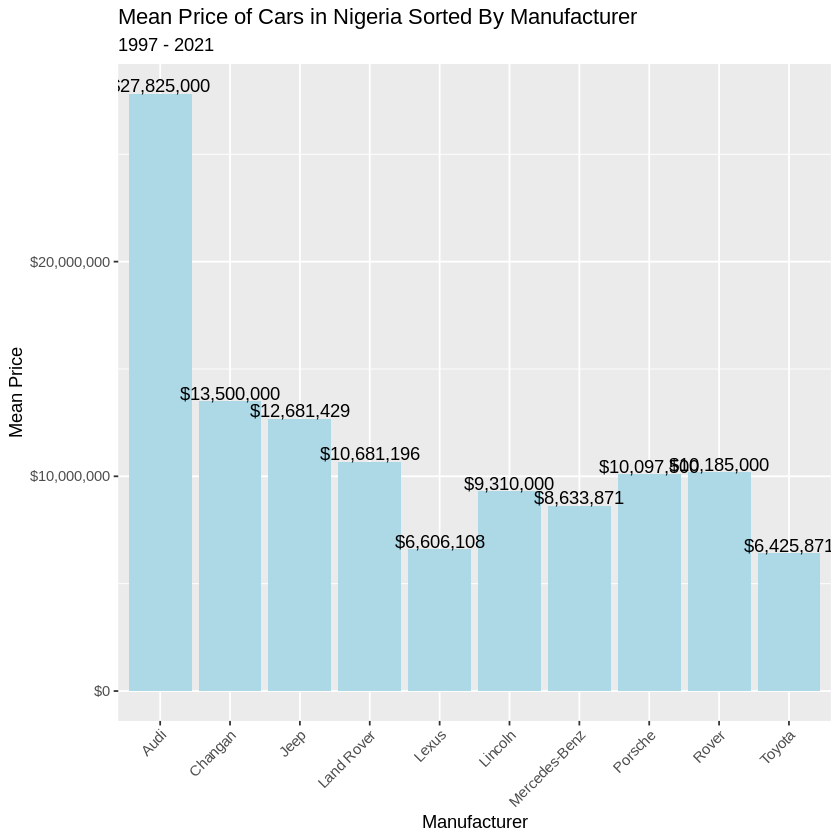

In [ ]:
plotter <- clean_car %>%
  group_by(Make) %>%
  summarize (average = mean (Price))


plotter_sort <- plotter [order(plotter$average, decreasing = TRUE),]
plotter_final_sort <- plotter_sort [c(1:10),]

ggplot(plotter_final_sort, 
       aes(x = factor(Make), 
           y = average)) +
  
  geom_col (width = 0.5) +

  geom_bar(stat = "identity", 
           fill = "lightblue") +
  
  geom_text(aes(label = dollar(average)), 
            vjust = -0.10) +
  
  scale_y_continuous(breaks = seq(0, 30000000, 10000000), 
                     label = dollar) +

  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1)) +
  
  labs(title = "Mean Price of Cars in Nigeria Sorted By Manufacturer",
       subtitle = "1997 - 2021",
       x = "Manufacturer",
       y = "Mean Price") 

The Average Price of cars remains the same for luxury cars in Nigeria from the year 1997 - 2021. This might be directly caused by the inflation of currency within this timeframe.

Visualisasi kedua


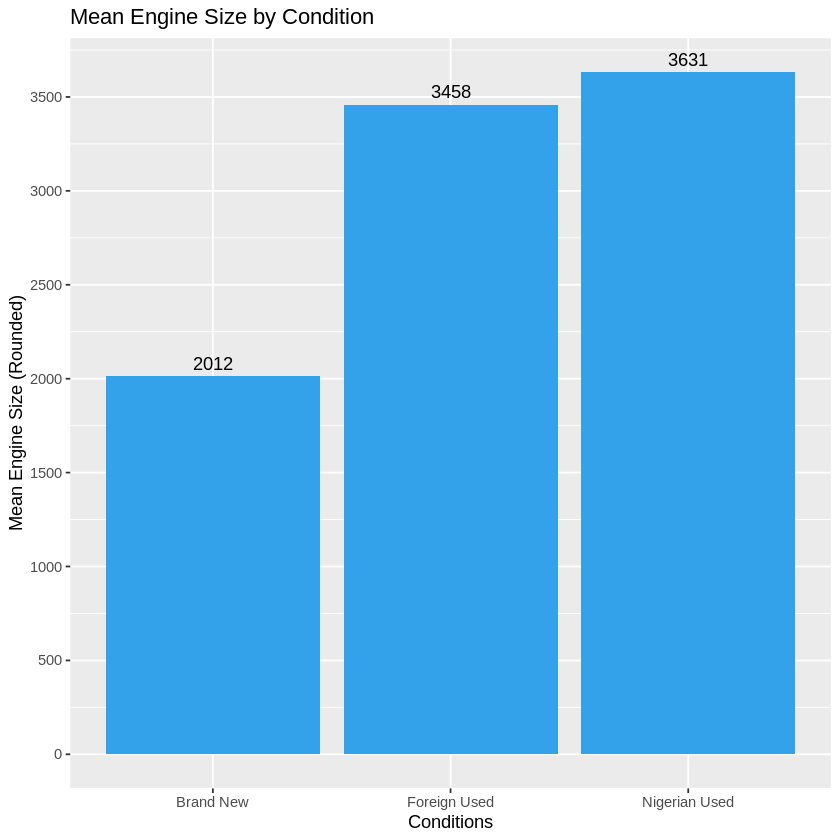

In [ ]:
data <- clean_car %>%
  group_by(Condition) %>%
  summarize(meanEngine = round(mean(Engine), digits = 0))

ggplot(data, 
       aes(x = factor(Condition, labels = c("Brand New", "Foreign Used", "Nigerian Used")), 
           y = meanEngine)) +

  geom_bar(stat = "identity", 
           fill = "#34a1eb") +

  geom_text(aes(label = meanEngine), 
            vjust = -0.5) +

  scale_y_continuous(breaks = seq(0, 4000, 500)) +

  labs(title = "Mean Engine Size by Condition",
       x = "Conditions",
       y = "Mean Engine Size (Rounded)")

As we can see from the graph, the "Brand New" cars has smaller engine size than others. And the "Nigerian Used" cars has bigger engine size than others. The "Foreign Used" and "Nigerian Used" almost have similar engine size.

Visualisasi Ketiga

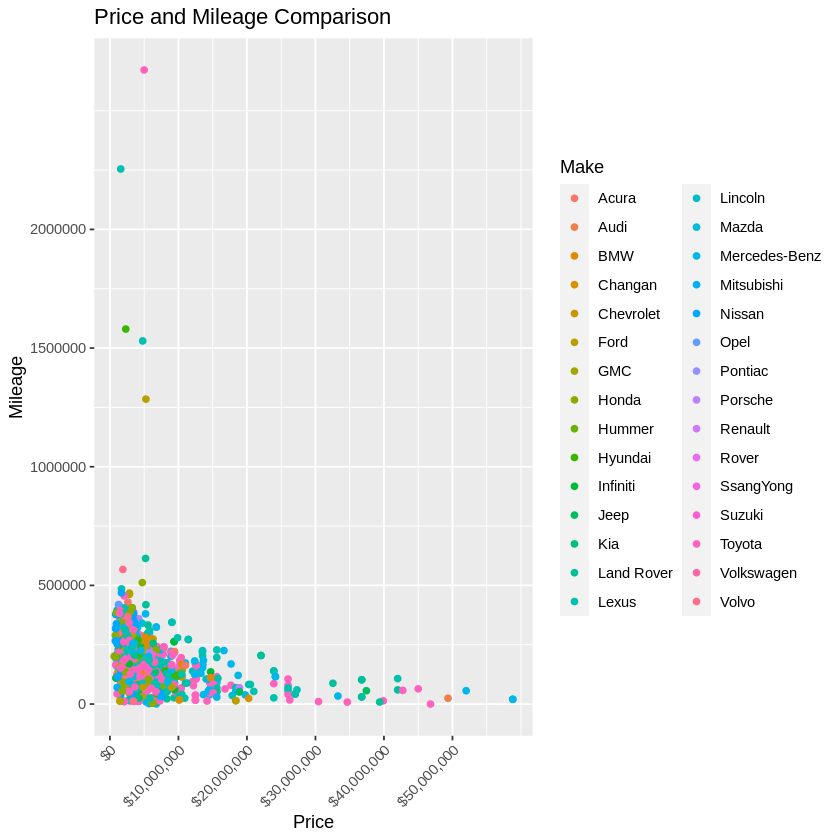

In [ ]:
 ## scatter plot 
ggplot(clean_car, aes(x = Mileage, 
                     y = Price, 
                     color=Make)) + 
geom_point() +

scale_y_continuous(breaks = seq(0, 50000000, 10000000), 
                     label = dollar) +
                       
scale_x_continuous(breaks = seq (0,2000000, 500000 )) +
                       
labs(title = "Price and Mileage Comparison")+
  coord_flip() + 
  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1))


Kesimpulan

dari grafik diatas dapat kita simpulkan bahwa semakin kecil jarak tempuh yg dimiliki semakin sedikit biaya yang dikeluarkan, sebaliknya semakin besar jarak tempuhnya, semakin besar biaya yang dikeluarkan.


Visualisasi keempat 

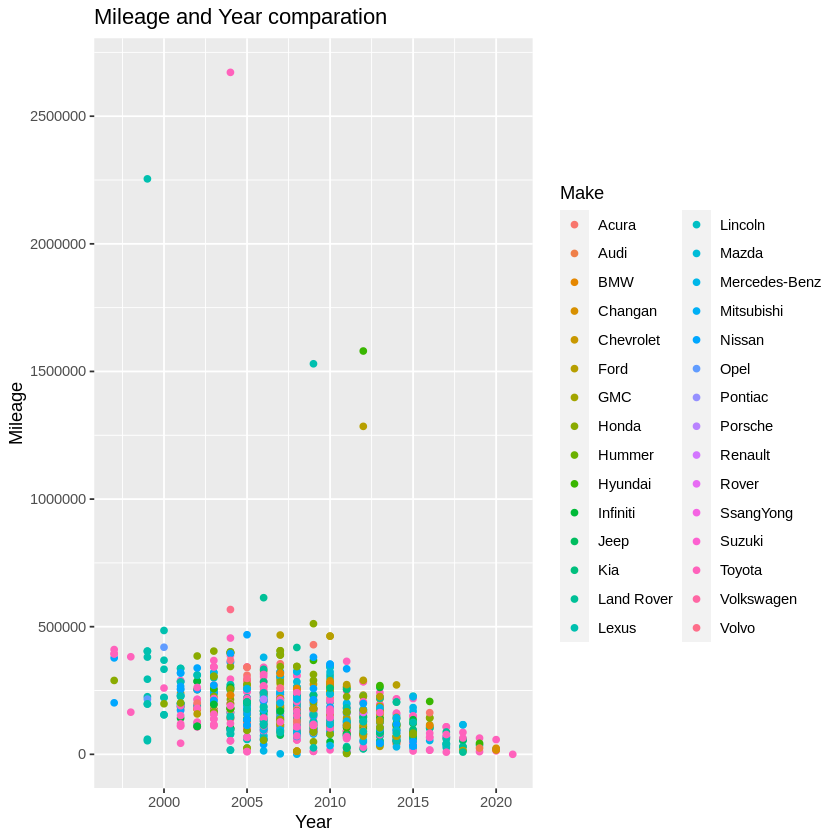

In [ ]:
library (ggplot2)
ggplot(clean_car,
        aes(x = Year,
            y = Mileage,
            color = Make) ) +
          
          scale_y_continuous(breaks = seq(0, 3000000, 500000)) +
                       
  geom_point() + 
  labs(title = "Mileage and Year comparation")

dari grafik diatas dapat kita simpulkan bahwa pemakaian kendaraan mobil di negeria memiliki rata rata jarak tempuh di bawah 500000 km atau rata rat odo meter mobil di negerian dibawah 500000 km



Visualisasi kelima
mencari rata rata engine di setiap merk

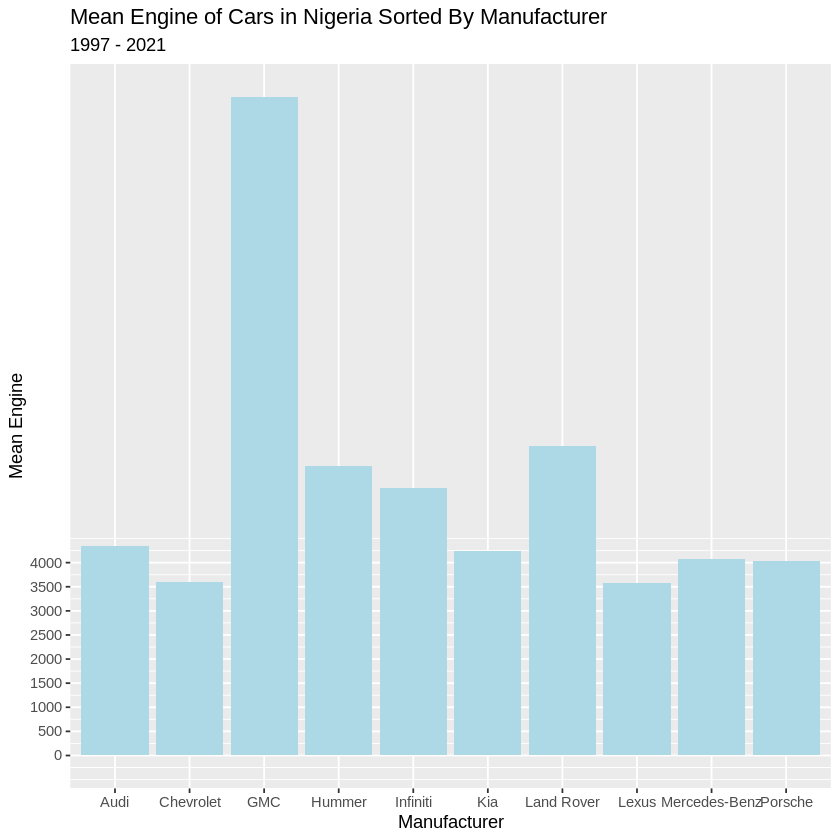

In [ ]:
plotter <- clean_car %>%
  group_by(Make) %>%
  summarize (average = mean (Engine))


plotter_sort <- plotter [order(plotter$average, decreasing = TRUE),]
plotter_final_sort <- plotter_sort [c(1:10),]

ggplot(plotter_final_sort, 
       aes(x = factor(Make), 
           y = average)) +
  
  scale_y_continuous(breaks = seq(0, 4000, 500)) +
  

  geom_bar(stat = "identity", 
           fill = "lightblue") +
  
  labs(title = "Mean Engine of Cars in Nigeria Sorted By Manufacturer",
       subtitle = "1997 - 2021",
       x = "Manufacturer",
       y = "Mean Engine") 

## 3. Exploratory Data Analysis

### 1. Independant and dependant variable

In [ ]:
names(clean_car)

summary(clean_car)


[1] "Make"         "Year"         "Condition"    "Mileage"      "Engine"      
[6] "Fuel"         "Transmission" "Price"

     Make                Year       Condition            Mileage       
 Length:1101        Min.   :1997   Length:1101        Min.   :     80  
 Class :character   1st Qu.:2006   Class :character   1st Qu.:  96648  
 Mode  :character   Median :2008   Mode  :character   Median : 151916  
                    Mean   :2008                      Mean   : 171960  
                    3rd Qu.:2011                      3rd Qu.: 218717  
                    Max.   :2021                      Max.   :2671736  
     Engine          Fuel           Transmission           Price         
 Min.   :    3   Length:1101        Length:1101        Min.   :  618750  
 1st Qu.: 3000   Class :character   Class :character   1st Qu.: 2520000  
 Median : 3500   Mode  :character   Mode  :character   Median : 3744000  
 Mean   : 3576                                         Mean   : 5871765  
 3rd Qu.: 3500                                         3rd Qu.: 6448000  
 Max.   :50000                                      

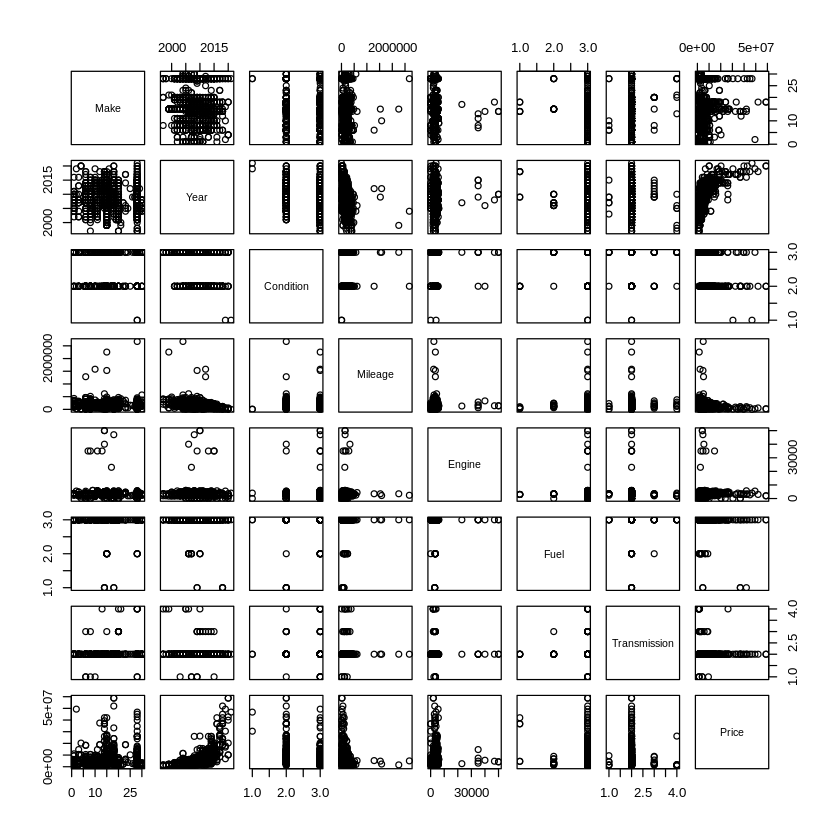

In [ ]:
plot(clean_car)

In [ ]:
data <- lm.data <- lm(Price~., data=clean_car)
anova(data)

summary(data)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Make,29,6.919879e+15,2.386165e+14,12.8760351,1.474134e-51
Year,1,1.898263e+16,1.898263e+16,1024.3255997,7.297875e-158
Condition,2,1.901201e+15,9.506003e+14,51.2955384,5.431358e-22
Mileage,1,1.393390e+13,1.393390e+13,0.7518898,3.860746e-01
Engine,1,3.247208e+13,3.247208e+13,1.7522325,1.858815e-01
Fuel,2,5.198730e+14,2.599365e+14,14.0264864,9.716594e-07
Transmission,3,2.473081e+14,8.243602e+13,4.4483470,4.091368e-03
Residuals,1061,1.966227e+16,1.853183e+13,NA,NA



Call:
lm(formula = Price ~ ., data = clean_car)

Residuals:
      Min        1Q    Median        3Q       Max 
-18334945  -2153869   -553645   1366509  39140876 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.872e+09  7.250e+07 -25.815  < 2e-16 ***
MakeAudi                1.686e+07  3.149e+06   5.352 1.06e-07 ***
MakeBMW                 3.857e+05  1.390e+06   0.277 0.781463    
MakeChangan            -1.791e+06  2.640e+06  -0.678 0.497701    
MakeChevrolet          -4.462e+05  4.381e+06  -0.102 0.918894    
MakeFord               -2.361e+06  8.897e+05  -2.653 0.008093 ** 
MakeGMC                -2.218e+06  2.636e+06  -0.842 0.400210    
MakeHonda              -4.664e+05  8.975e+05  -0.520 0.603400    
MakeHummer              5.527e+06  3.144e+06   1.758 0.079086 .  
MakeHyundai            -3.146e+06  1.113e+06  -2.827 0.004789 ** 
MakeInfiniti            1.449e+06  1.162e+06   1.247 0.212613    
MakeJeep                4.765e

**MEMANFAATKAN REGRESI LINER UNTUK MENENTUKAN VARIABEL DEPENDENT DAN INDEPENDENT.** 

untuk variabel : 
- dependet = Price 
- independent = Make, Year, Condition, Mileage, Engine, Fuel, Transmission

sehingga kita menggunakan **Anova()** untuk membandingkan rata-rata dari setiap variabel independentnya

kita menggunakan **summary()** untuk mengeluarkan output yang dibutuhkan dalam regresi linear, seperti nilai ***R^2 = 0.5927*** yang menunjukan bahwa variabel independent terbukti dapat memprediksi variabel dependent.

In [ ]:
vif(data)

,GVIF,Df,GVIF^(1/(2*Df))
Make,1.774787,29,1.009940
Year,1.435191,1,1.197995
Condition,1.181087,2,1.042487
Mileage,1.157204,1,1.075734
Engine,1.094986,1,1.046416
Fuel,1.094082,2,1.022733
Transmission,1.239331,3,1.036409


Mencari nilai **VIF (Variance Inflation Factor)** untuk mengetahui nilai korelasi dengan variabel dependent (Price). 

->    sehingga diperoleh nilai **VIF < 10** untuk semua variabel independent terhadap variabel dependet, sehingga tidak terjadi multikolinearitas. 

### 2. Missing value and Imputation

In [ ]:
newdata <- nigerian_cars
colnames(newdata)[3] <- "Year"
colnames(newdata)[6] <- "Engine"
head(newdata)

...1,Make,Year,Condition,Mileage,Engine,Fuel,Transmission,Price,Build
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
0,Toyota,2007,Nigerian Used,166418,2400,Petrol,Automatic,3120000,NA
1,Lexus,NA,NA,138024,NA,NA,Automatic,5834000,NA
2,Mercedes-Benz,2008,Nigerian Used,376807,3000,Petrol,Automatic,3640000,NA
3,Lexus,NA,NA,213362,NA,NA,Automatic,3594000,NA
4,Mercedes-Benz,NA,NA,106199,NA,NA,Automatic,8410000,NA
5,Mercedes-Benz,NA,NA,87660,NA,NA,Automatic,5554000,NA


In [ ]:
any(is.na(newdata))
install.packages('mice')
library('mice')

[1] TRUE

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,...1,Make,Price,Transmission,Mileage,Year,Condition,Fuel,Engine,Build,
1101,1,1,1,1,1,1,1,1,1,1,0
2422,1,1,1,1,1,1,1,1,1,0,1
7,1,1,1,1,1,1,1,1,0,1,1
21,1,1,1,1,1,1,1,1,0,0,2
2,1,1,1,1,1,1,1,0,1,1,1
4,1,1,1,1,1,1,1,0,1,0,2
2,1,1,1,1,1,1,1,0,0,0,3
458,1,1,1,1,1,0,0,0,0,0,5
15,1,1,1,1,0,1,1,1,1,1,1
34,1,1,1,1,0,1,1,1,1,0,2


[1] "...1"         "Make"         "Year"         "Condition"    "Mileage"     
 [6] "Engine"       "Fuel"         "Transmission" "Price"        "Build"

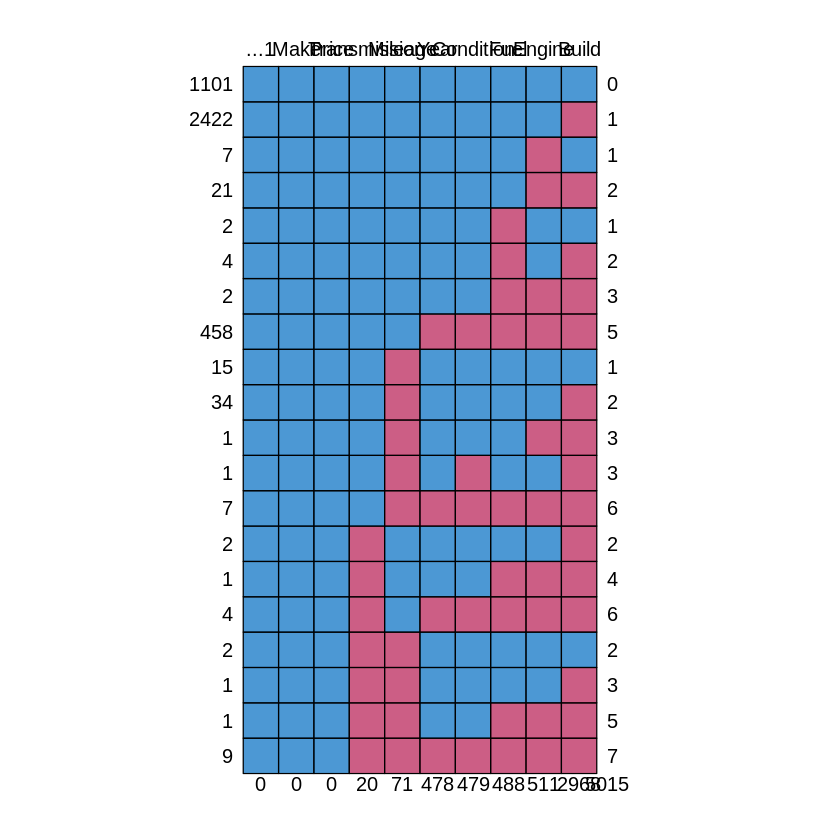

In [ ]:
md.pattern(newdata)
my_colnames <- names(newdata)
my_colnames

***Mean condition Engine***



In [ ]:
nigerian_cars2 <- newdata
mean(nigerian_cars2$Engine)
mean(nigerian_cars2$Engine, na.rm = TRUE)

nigerian_cars2$Engine[is.na(nigerian_cars2$Engine)] <- mean(nigerian_cars2$Engine,na.rm = TRUE)
nigerian_cars2

[1] NA

[1] 3274.977

...1,Make,Year,Condition,Mileage,Engine,Fuel,Transmission,Price,Build
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
0,Toyota,2007,Nigerian Used,166418,2400.000,Petrol,Automatic,3120000,NA
1,Lexus,NA,NA,138024,3274.977,NA,Automatic,5834000,NA
2,Mercedes-Benz,2008,Nigerian Used,376807,3000.000,Petrol,Automatic,3640000,NA
3,Lexus,NA,NA,213362,3274.977,NA,Automatic,3594000,NA
4,Mercedes-Benz,NA,NA,106199,3274.977,NA,Automatic,8410000,NA
5,Mercedes-Benz,NA,NA,87660,3274.977,NA,Automatic,5554000,NA
6,Lexus,NA,NA,191411,3274.977,NA,Automatic,3706000,NA
7,Lexus,NA,NA,59092,3274.977,NA,Automatic,8410000,NA
8,Mercedes-Benz,NA,NA,89423,3274.977,NA,Automatic,6506000,NA


***Mean condition Mileage***

In [ ]:
mean(nigerian_cars2$Mileage)
mean(nigerian_cars2$Mileage, na.rm = TRUE)

nigerian_cars2$Mileage[is.na(nigerian_cars2$Mileage)] <- mean(nigerian_cars2$Mileage,na.rm = TRUE)
nigerian_cars2

[1] NA

[1] 182533.7

...1,Make,Year,Condition,Mileage,Engine,Fuel,Transmission,Price,Build
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
0,Toyota,2007,Nigerian Used,166418,2400.000,Petrol,Automatic,3120000,NA
1,Lexus,NA,NA,138024,3274.977,NA,Automatic,5834000,NA
2,Mercedes-Benz,2008,Nigerian Used,376807,3000.000,Petrol,Automatic,3640000,NA
3,Lexus,NA,NA,213362,3274.977,NA,Automatic,3594000,NA
4,Mercedes-Benz,NA,NA,106199,3274.977,NA,Automatic,8410000,NA
5,Mercedes-Benz,NA,NA,87660,3274.977,NA,Automatic,5554000,NA
6,Lexus,NA,NA,191411,3274.977,NA,Automatic,3706000,NA
7,Lexus,NA,NA,59092,3274.977,NA,Automatic,8410000,NA
8,Mercedes-Benz,NA,NA,89423,3274.977,NA,Automatic,6506000,NA


***Mean condition Year***

In [ ]:
mean(nigerian_cars2$Year)
mean(nigerian_cars2$Year, na.rm = TRUE)

nigerian_cars2$Year[is.na(nigerian_cars2$Year)] <- mean(nigerian_cars2$Year,na.rm = TRUE)
nigerian_cars2

[1] NA

[1] 2007.899

...1,Make,Year,Condition,Mileage,Engine,Fuel,Transmission,Price,Build
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
0,Toyota,2007.000,Nigerian Used,166418,2400.000,Petrol,Automatic,3120000,NA
1,Lexus,2007.899,NA,138024,3274.977,NA,Automatic,5834000,NA
2,Mercedes-Benz,2008.000,Nigerian Used,376807,3000.000,Petrol,Automatic,3640000,NA
3,Lexus,2007.899,NA,213362,3274.977,NA,Automatic,3594000,NA
4,Mercedes-Benz,2007.899,NA,106199,3274.977,NA,Automatic,8410000,NA
5,Mercedes-Benz,2007.899,NA,87660,3274.977,NA,Automatic,5554000,NA
6,Lexus,2007.899,NA,191411,3274.977,NA,Automatic,3706000,NA
7,Lexus,2007.899,NA,59092,3274.977,NA,Automatic,8410000,NA
8,Mercedes-Benz,2007.899,NA,89423,3274.977,NA,Automatic,6506000,NA


,...1,Make,Year,Mileage,Engine,Price,Transmission,Condition,Fuel,Build,
1123,1,1,1,1,1,1,1,1,1,1,0
2478,1,1,1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,1
6,1,1,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,1,1,0,1,0,2
465,1,1,1,1,1,1,1,0,0,0,3
2,1,1,1,1,1,1,0,1,1,1,1
3,1,1,1,1,1,1,0,1,1,0,2
2,1,1,1,1,1,1,0,1,0,0,3
13,1,1,1,1,1,1,0,0,0,0,4


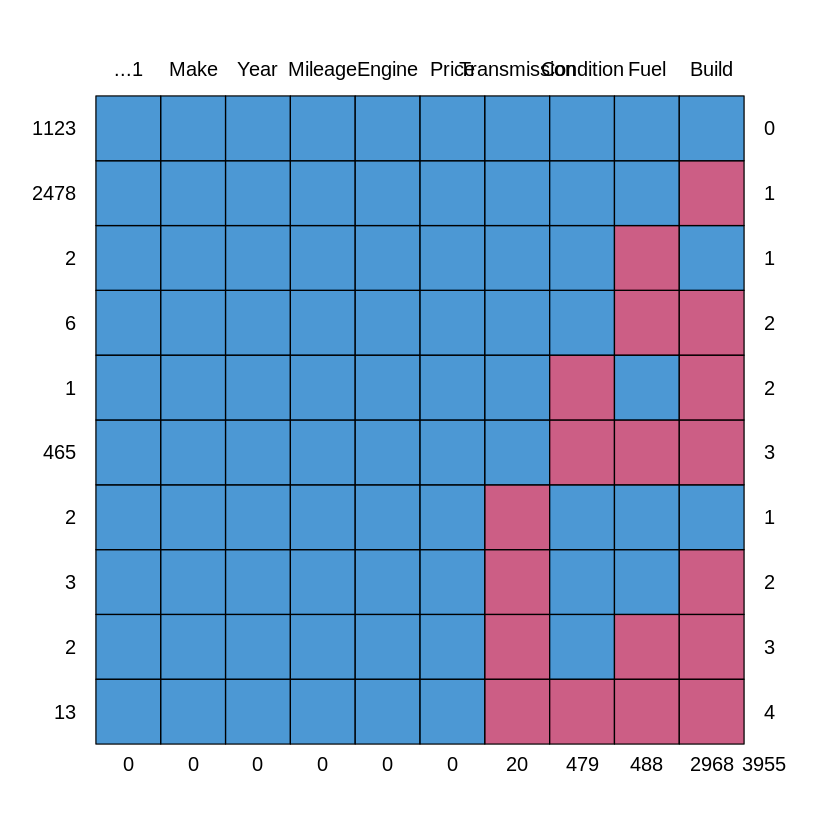

In [ ]:
#perubahan missing value
md.pattern(nigerian_cars2)

Dari missing value kita dapat mempelajari cara membaca missing value,memanggil missing value dan mengubah missing value menjadi mean,median

### 3. Outlier Handling

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


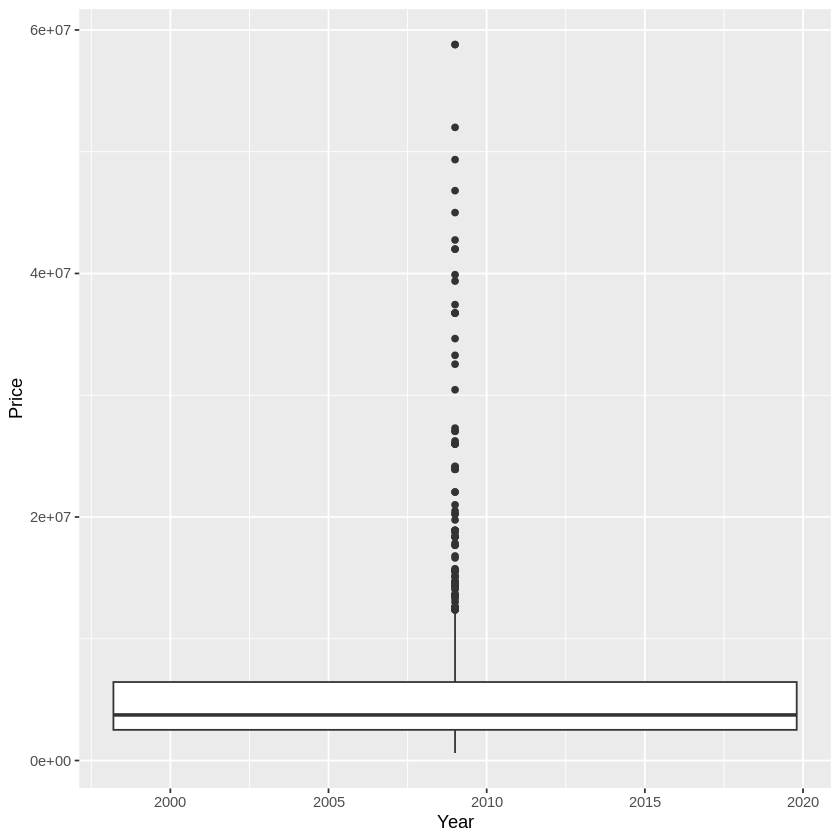

In [ ]:
clean_car_box <- select (clean_car, "Price", "Year")
clean_car_box$Price <- gsub (",","",clean_car$Price)
clean_car_box$Price <- as.numeric(clean_car$Price)

outliers <- clean_car_box %>%
  group_by(Year)

ggplot(outliers, aes(x=Year, y=Price)) +
  geom_boxplot()

     Price           Condition        
 Min.   : 1260000   Length:334        
 1st Qu.: 3993500   Class :character  
 Median : 6240000   Mode  :character  
 Mean   : 8964097                     
 3rd Qu.: 9828000                     
 Max.   :58800000                     

     Price           Condition        
 Min.   :  618750   Length:765        
 1st Qu.: 2080000   Class :character  
 Median : 3150000   Mode  :character  
 Mean   : 4436020                     
 3rd Qu.: 5200000                     
 Max.   :49350000                     

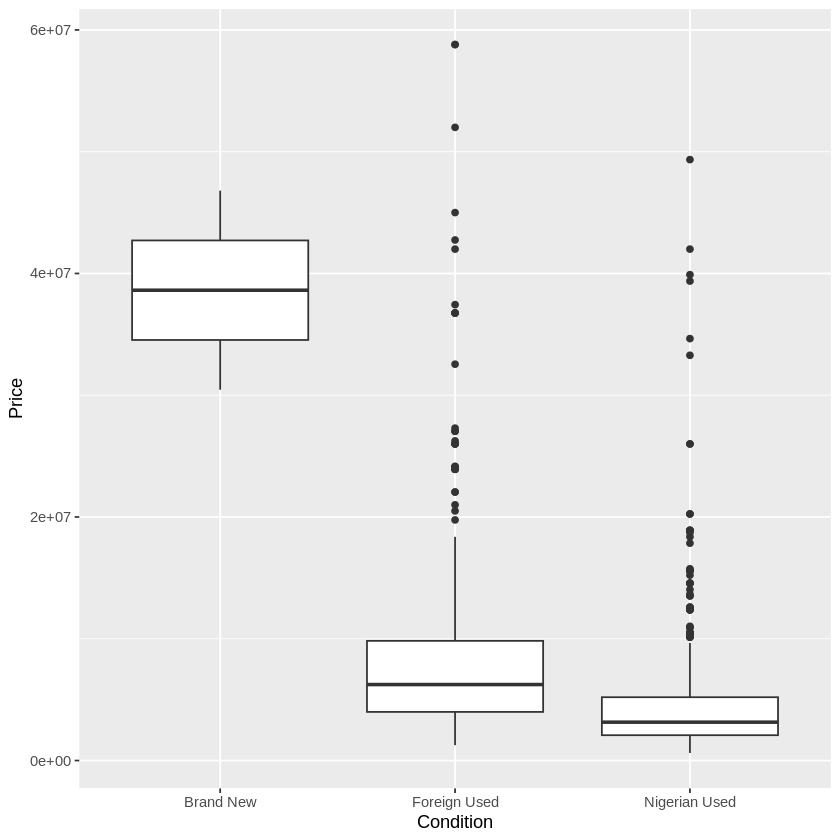

In [ ]:
clean_car_box <- select (clean_car, "Price", "Condition")
clean_car_box$Price <- gsub (",","",clean_car$Price)
clean_car_box$Price <- as.numeric(clean_car$Price)

outliers <- clean_car_box %>%
  group_by(Condition)

ggplot(outliers, aes(x=Condition, y=Price)) +
  geom_boxplot()

outliers_foreign <- filter(outliers, Condition %in% c("Foreign Used"))
outliers_nigerian <- filter(outliers, Condition %in% c("Nigerian Used"))

summary(outliers_foreign)
summary(outliers_nigerian)

Dari boxplot diatas, kita bisa lihat terdapat outliers pada kondisi "Foreign Used" dan "Nigerian Used". Oleh karena itu, kami mencari kuartil atas dan kuartil bawah untuk mendapatkan batas atas dan batas bawah outline.

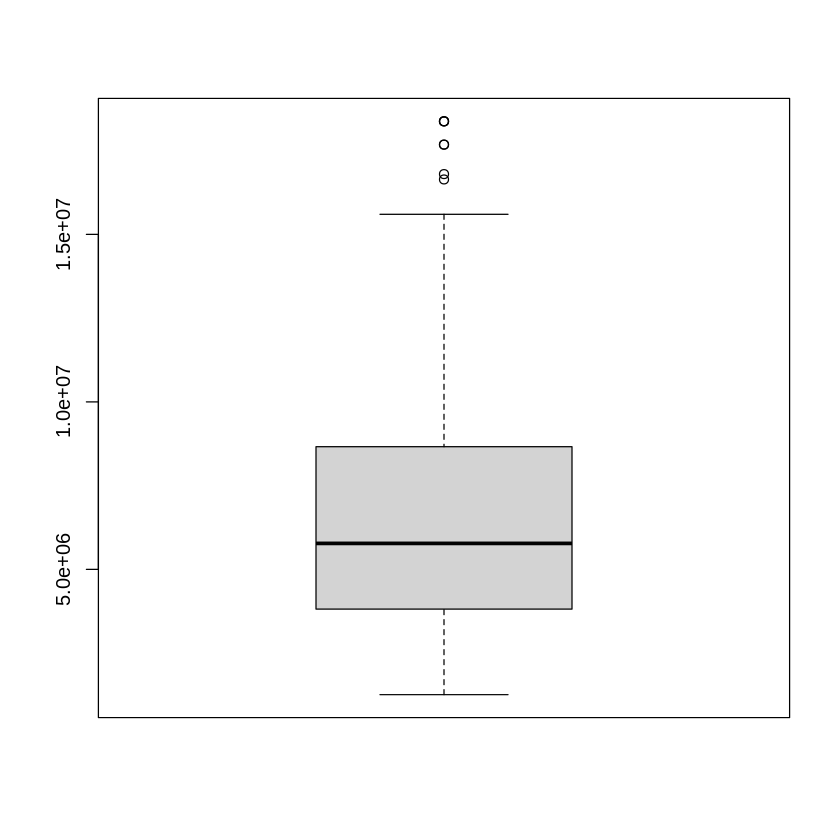

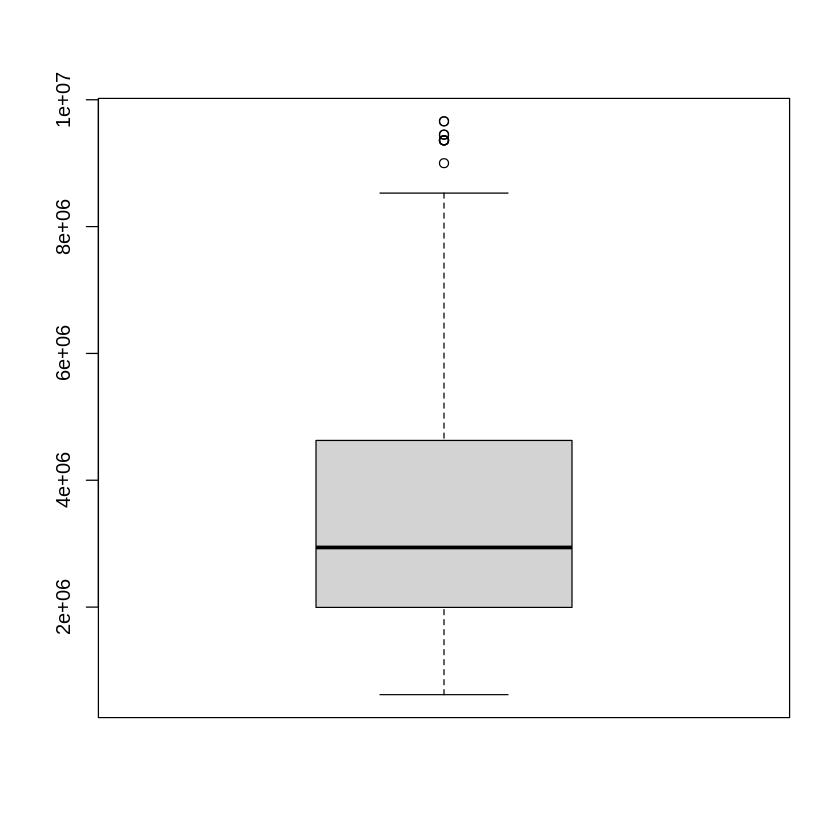

In [ ]:
quartiles_foreign <- quantile(outliers_foreign$Price, probs=c(.25, .75), na.rm = FALSE)
IQR_foreign <- IQR(outliers_foreign$Price)
quartiles_nigerian <- quantile(outliers_nigerian$Price, probs=c(.25, .75), na.rm = FALSE)
IQR_nigerian <- IQR(outliers_nigerian$Price)

lowerQuartile_foreign <- quartiles_foreign[1] - 1.5 * IQR_foreign
upperQuartile_foreign <- quartiles_foreign[2] + 1.5 * IQR_foreign
lowerQuartile_nigerian <- quartiles_nigerian[1] - 1.5 * IQR_nigerian
upperQuartile_nigerian <- quartiles_nigerian[2] + 1.5 * IQR_nigerian

outliers_foreign_clean <- subset(outliers_foreign, outliers_foreign$Price > lowerQuartile_foreign & outliers_foreign$Price < upperQuartile_foreign)
outliers_nigerian_clean <- subset(outliers_nigerian, outliers_nigerian$Price > lowerQuartile_nigerian & outliers_nigerian$Price < upperQuartile_nigerian)

boxplot(outliers_foreign_clean$Price, horizontal=FALSE, axes=TRUE) 
boxplot(outliers_nigerian_clean$Price, horizontal=FALSE, axes=TRUE)


Kami telah menghilangkan nilai-nilai yang berada diluar outline pada kondisi "Foreign Used" dan "Nigerian Used". Sehingga, terbentuklah boxlplot seperti diatas ini.

### 4. Correlation between features

Make         Year    Condition      Mileage       Engine         Fuel 
 "character"    "numeric"  "character"    "numeric"    "numeric"  "character" 
Transmission        Price 
 "character"    "numeric"

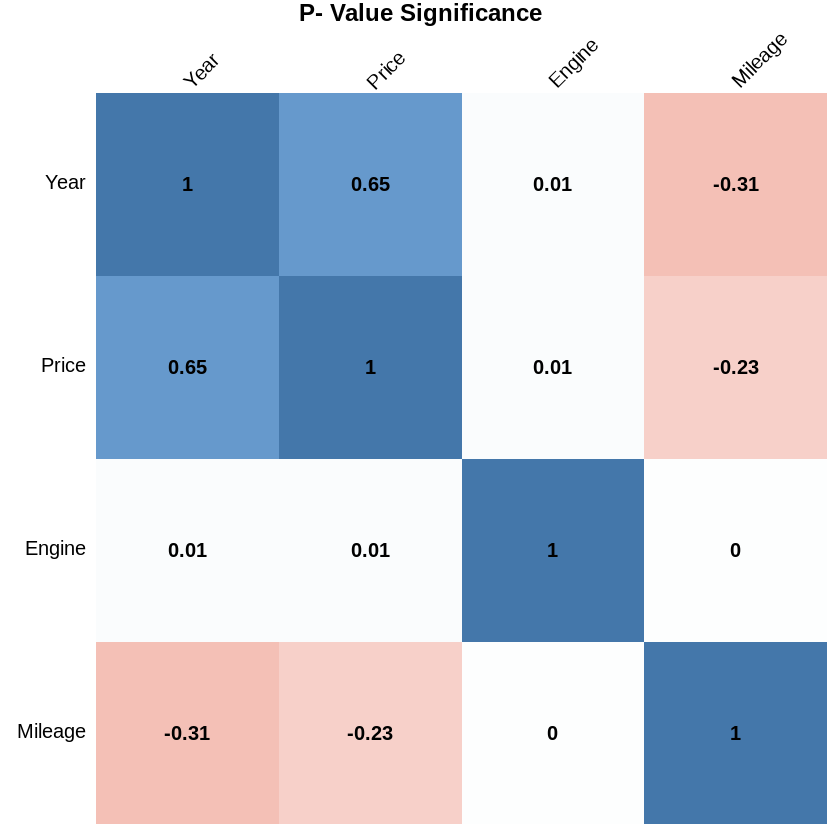

In [ ]:
## Changing Price to numeric value
clean_car$Price <- gsub (",","",clean_car$Price)
clean_car$Price <- as.numeric(clean_car$Price)

## check type of the varibles
sapply(clean_car, mode)
## selecting the numeric values to create a correlation plot 
clean_car_num <- select(clean_car, "Mileage","Engine", "Price", "Year")
clean_car_num <- na.omit(clean_car_num)

## Correlation Plots ##
newer <- round (cor (clean_car_num),2)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
title <- "P- Value Significance"

corrplot(newer, method = "shade", shade.col = NA, tl.col = "black", tl.srt = 45,
         col = col(200), title = title,  mar=c(0,0,1,0),
          addCoef.col = "black", cl.pos = "n", order = "AOE")


dari plot korelasi kita dapat melihat beberapa hubungan antara variable yang ada, tertutama dengan tahun pembuatan mobilnya. kita dapat membaca data ini dengan melihat angka yang sudah tertera dalam graphic. 0 menandakan tidak ada korelasi, -1  yang menandakan hubungan korelasi negatif, dan 1 yang menandakan korelasi positif. 


**Tidak ada Korelasi** : 

Kekuatan mesin tidak memiliki korelasi apapun dengan variable lainnya. 

**Korelasi Positif** : 0.65 

Karena valuenya mendekati 1, maka ada korelasi positif yang relatif kuat antara harga mobil dengan tahun pembuatannya. Semakin meninggi tahun pembautan mobilnya maka semakin tinggi juga harga mobil tersebut. 

**Korelasi Negatif** : -0.23

Karena valuenya mendekati -1, maka ada korelasi negatif yang relatif lemah antara harga mobil dengan penggunaannya. Kita dapat melihat juga bahwa semakin tinggi tahun sebuah mobil, maka penggunaan (Mileage) semakin menurun. 

# Additional Data Visualization

In [ ]:
nullBuild <- sum(is.na(nigerian_cars["Build"]))
percentageNullBuild <- nullBuild / nrow(nigerian_cars) * 100
percentageNullBuild

[1] 72.47863

In [ ]:
sum(is.na(nigerian_cars))

[1] 5015

In [ ]:
nonBuild <- select(nigerian_cars, -1, -Build)
sum(is.na(nonBuild))

[1] 2047

In [ ]:
testing <- select(nigerian_cars, -1, -Build)
print(colnames(clean_car))

[1] "Make"         "Year"         "Condition"    "Mileage"      "Engine"      
[6] "Fuel"         "Transmission" "Price"       


In [ ]:
sum(nrow(clean_car))

[1] 1101

In [ ]:
summary(clean_car)

     Make                Year       Condition            Mileage       
 Length:1101        Min.   :1997   Length:1101        Min.   :     80  
 Class :character   1st Qu.:2006   Class :character   1st Qu.:  96648  
 Mode  :character   Median :2008   Mode  :character   Median : 151916  
                    Mean   :2008                      Mean   : 171960  
                    3rd Qu.:2011                      3rd Qu.: 218717  
                    Max.   :2021                      Max.   :2671736  
     Engine          Fuel           Transmission           Price         
 Min.   :    3   Length:1101        Length:1101        Min.   :  618750  
 1st Qu.: 3000   Class :character   Class :character   1st Qu.: 2520000  
 Median : 3500   Mode  :character   Mode  :character   Median : 3744000  
 Mean   : 3576                                         Mean   : 5871765  
 3rd Qu.: 3500                                         3rd Qu.: 6448000  
 Max.   :50000                                      

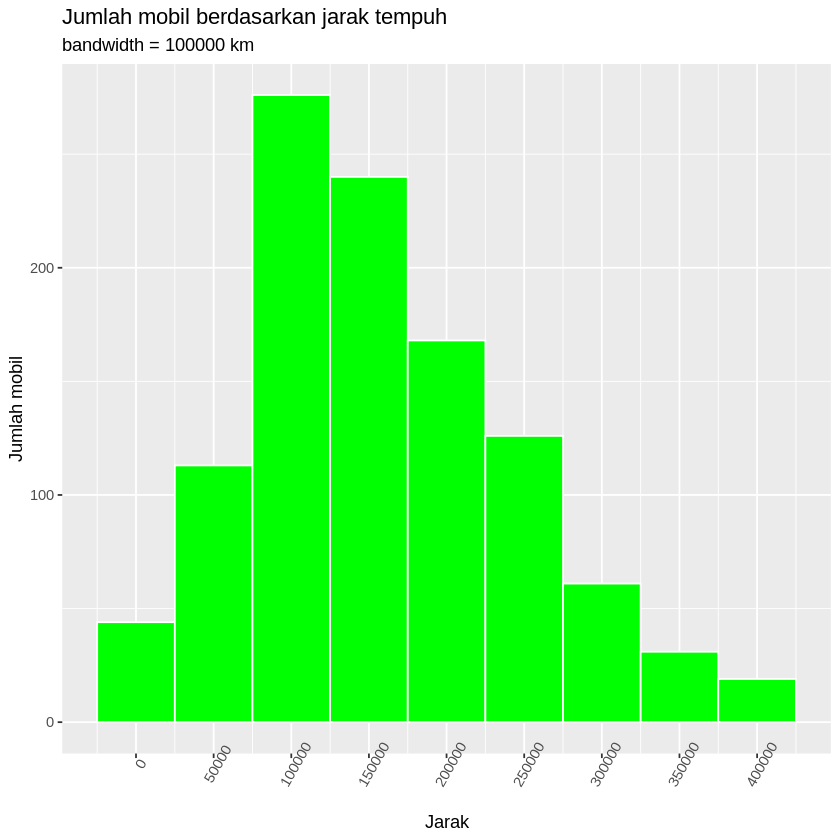

In [ ]:
outlierPrice <- clean_car$Mileage

QPrice <- quantile(outlierPrice, probs=c(.25, .75), na.rm = FALSE)
IQRPrice <- IQR(outlierPrice)

LPrice <- QPrice[1] - (1.5 * IQRPrice)
UPrice <- QPrice[2] + (1.5 * IQRPrice)

clean_car <- subset(clean_car, outlierPrice > LPrice & outlierPrice < UPrice)

ggplot(clean_car, aes(x = Mileage)) +
  geom_histogram(fill = "green", color = "white", binwidth = 50000) +
  labs(title = "Jumlah mobil berdasarkan jarak tempuh", subtitle = "bandwidth = 100000 km", y = "Jumlah mobil", x = "Jarak") +
  scale_x_continuous(breaks = seq(0, 2671736, 50000)) +
  theme(axis.text.x = element_text(angle = 60))

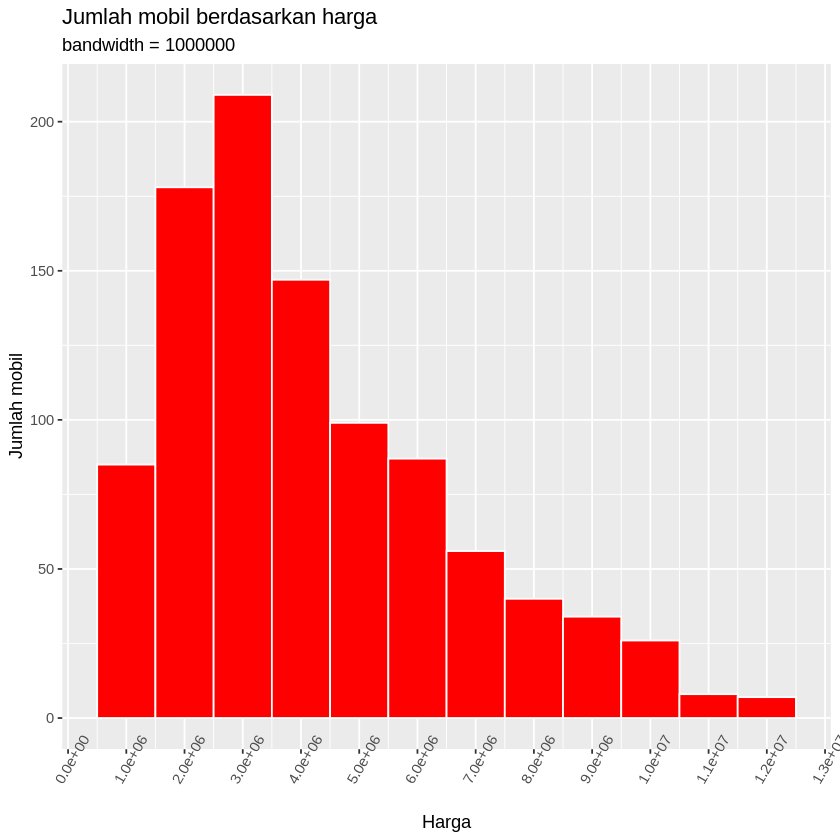

In [ ]:
outlierPrice <- clean_car$Price

QPrice <- quantile(outlierPrice, probs=c(.25, .75), na.rm = FALSE)
IQRPrice <- IQR(outlierPrice)

LPrice <- QPrice[1] - (1.5 * IQRPrice)
UPrice <- QPrice[2] + (1.5 * IQRPrice)

clean_car <- subset(clean_car, outlierPrice > LPrice & outlierPrice < UPrice)

ggplot(clean_car, aes(x = Price)) +
  geom_histogram(fill = "red", color = "white", binwidth = 1000000) +
  labs(title = "Jumlah mobil berdasarkan harga", subtitle = "bandwidth = 1000000", y = "Jumlah mobil", x = "Harga") +
  scale_x_continuous(breaks = seq(0, 58800000, 1000000)) +
  theme(axis.text.x = element_text(angle = 60))

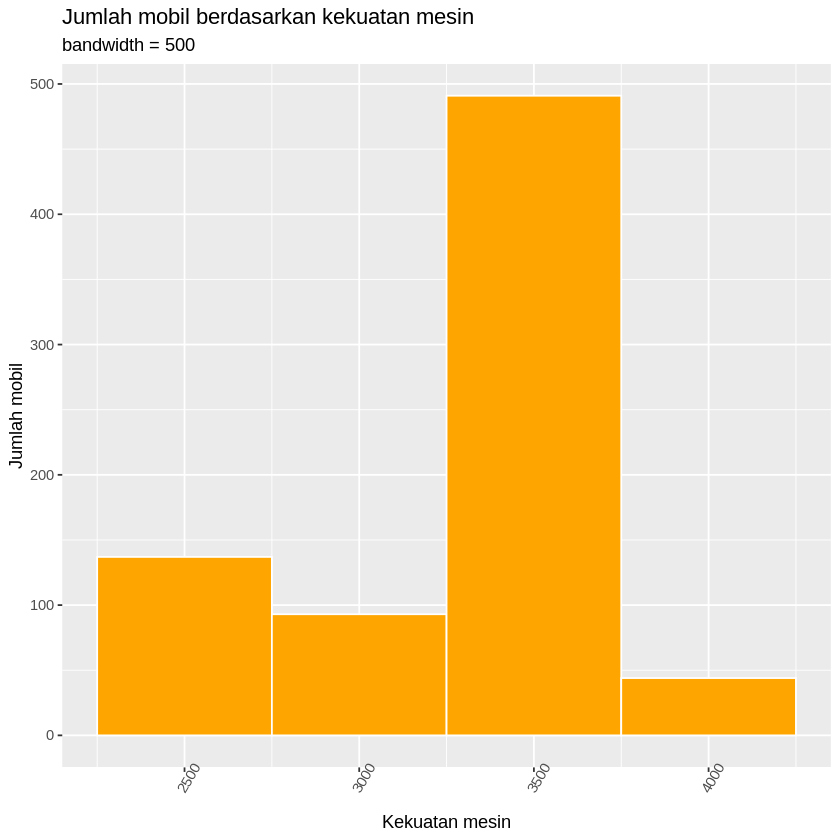

In [ ]:
outlierPrice <- clean_car$Engine

QPrice <- quantile(outlierPrice, probs=c(.25, .75), na.rm = FALSE)
IQRPrice <- IQR(outlierPrice)

LPrice <- QPrice[1] - (1.5 * IQRPrice)
UPrice <- QPrice[2] + (1.5 * IQRPrice)

clean_car <- subset(clean_car, outlierPrice > LPrice & outlierPrice < UPrice)

ggplot(clean_car, aes(x = Engine)) +
  geom_histogram(fill = "orange", color = "white", binwidth = 500) +
  labs(title = "Jumlah mobil berdasarkan kekuatan mesin", subtitle = "bandwidth = 500", y = "Jumlah mobil", x = "Kekuatan mesin") +
  scale_x_continuous(breaks = seq(0, 50000, 500)) +
  theme(axis.text.x = element_text(angle = 60))

## 1


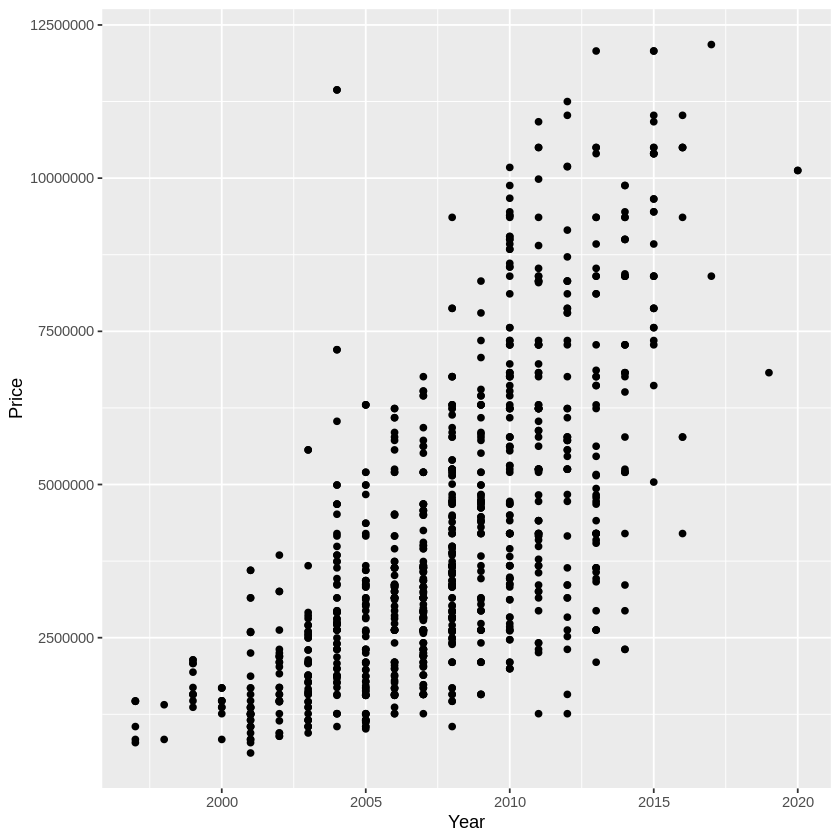

In [ ]:
# Before 
price_scatter_before <- ggplot(clean_car, aes (x = Year, y = Price)) + geom_point()
price_scatter_before

outlierPrice <- clean_car$Price

QPrice <- quantile(outlierPrice, probs=c(.25, .75), na.rm = FALSE)
IQRPrice <- IQR(outlierPrice)

LPrice <- QPrice[1] - (1.5 * IQRPrice)
UPrice <- QPrice[2] + (1.5 * IQRPrice)

clean_car <- subset(clean_car, outlierPrice > LPrice & outlierPrice < UPrice)

# Visualization ====

outliers <- clean_car %>%
  group_by(Year)

price_hist <- ggplot(clean_car, aes (x = Year, y = Price)) + 
  geom_point(shape = 1)  + 
  labs(x = "Year Of the Manufacture", y = "Price of The Car") + theme_hc() + 
  theme(axis.title = element_text())

box_new <- ggplot (outliers, aes (Price, group = 1)) + geom_boxplot(width = 0.7) + coord_flip() +
theme_hc()

price_dens <- ggplot(clean_car, aes (x = Price, group = 1)) + 
  geom_density() + 
  theme_hc() + 
  theme(axis.title = element_text()) + 
  scale_y_continuous(breaks = c(0,20000000, 50000000))

In [ ]:
price_hist

In [ ]:
price_dens

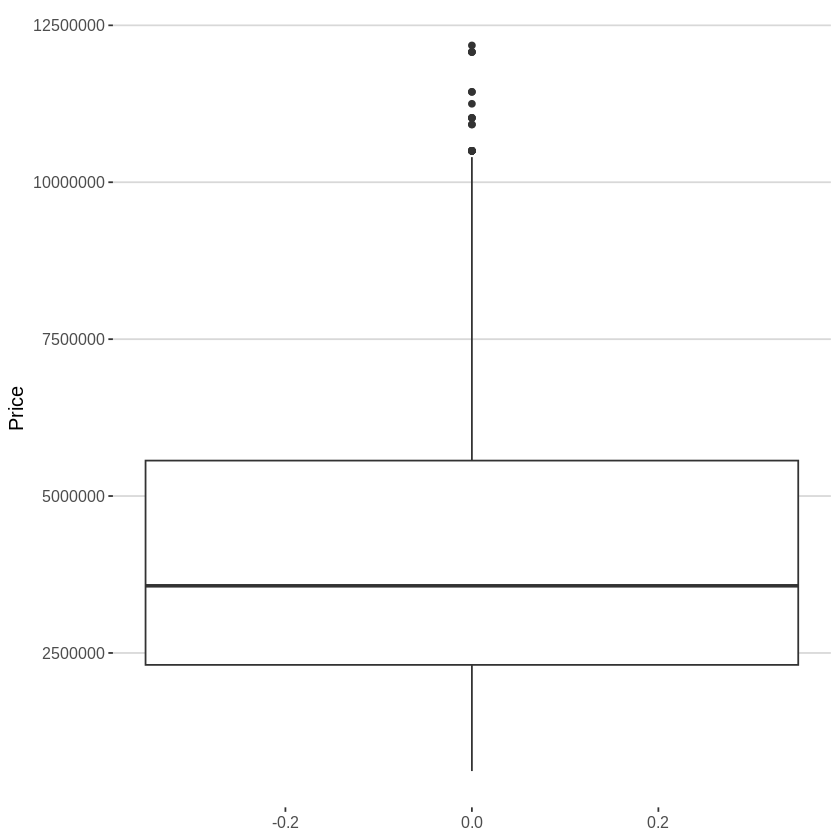

In [ ]:
box_new